In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example of using numpy, pandas, and matplotlib

## Creating dataframe

In [2]:
df = pd.DataFrame(columns=['A', 'B'])

for col in df.columns:
    df[col] = np.random.lognormal(size=200000)

df['C'] = np.abs(np.random.normal(size=200000))

df['D'] = df['A'] * df['C']

df.head()

,A,B,C,D
0,2.790269,0.672617,2.271672,6.338575
1,0.833217,0.375225,1.763277,1.469192
2,6.985066,1.565394,1.166603,8.148795
3,0.967050,0.425377,0.468131,0.452706
4,0.337629,2.002245,0.269943,0.091140


## Testing log, square root, square; plotting the results

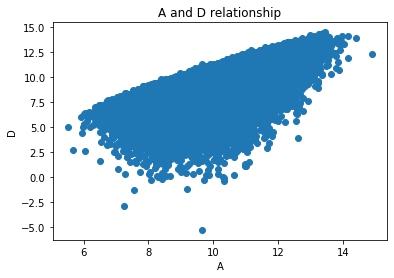

In [3]:
# Final thing

# df['D'] = np.sqrt(df['D'])
df = np.log(df) + 10

plt.scatter(df['A'], df['D'])
plt.xlabel('A')
plt.ylabel('D')
plt.title('A and D relationship')
plt.show()

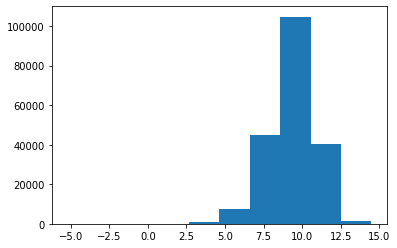

In [4]:
plt.hist(df['D'])
plt.show()

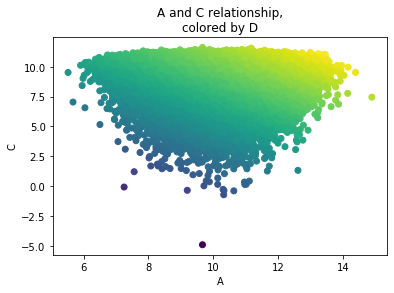

In [5]:
plt.scatter(df['A'], df['C'], c=df['D'])
plt.xlabel('A')
plt.ylabel('C')
plt.title('A and C relationship,\ncolored by D')
plt.show()